# 1D Linear Regression — Gradient Descent

We fit the line $\hat{y} = \theta^T x$ (i.e. $\hat{y} = \theta_0 + \theta_1 x$) by minimizing the cost $J(\theta)$ using gradient descent. Data is loaded from `data_1d.csv` (one feature $x$, target $y$).

## Imports

NumPy for arrays and math; Matplotlib for plotting.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

### Funciones para la Regresión Lineal

Same as in `lin_reg.ipynb`: hypothesis $h_\theta(X) = \theta^T X$, cost $J(\theta)$, and gradient $\frac{\partial J}{\partial \theta}$.

### Hypothesis

$h_\theta(X) = \theta^T X$. For 1D with bias: $X$ has shape $(2 \times m)$ (first row ones, second row $x$), $\theta$ is $(2 \times 1)$, so $\hat{y}^{(i)} = \theta_0 + \theta_1 x^{(i)}$.

In [17]:
def h(X, theta):
    'Hipótesis para la regresión lineal, devuelve una matriz de (1, m)'
    return np.dot(np.transpose(theta), X)

### Cost function

$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$

In [18]:
def J(X, y, theta):
    'Función de costo, devuelve un escalar'
    m = X.shape[1]
    return (1 / (2 * m)) * np.sum(np.square(h(X, theta) - y))

### Gradient of the cost

$\frac{\partial J}{\partial \theta} = \frac{1}{m} X (h_\theta(X) - y)^T$, shape $(2 \times 1)$ for 1D.

In [19]:
def dJ(X, y, theta):
    'Gradiente del costo, devuelve una matriz de (n+1, 1)'
    m = X.shape[1]
    return (1 / m) * np.dot((h(X, theta) - y), np.transpose(X)).reshape((-1, 1))

## Load the data

Read $(x, y)$ pairs from `data_1d.csv`. Build $X$ as shape $(1 \times m)$ (one feature) and $y$ as $(1 \times m)$.

In [20]:
X_list = []
Y_list = []
for line in open('data_1d.csv'):
    x_val, y_val = line.split(',')
    X_list.append(float(x_val))
    Y_list.append(float(y_val))

X = np.array(X_list).reshape(1, -1)   # (1, m)
y = np.array(Y_list).reshape(1, -1)   # (1, m)

## Feature scaling

Normalize the feature to mean 0 and std 1 so gradient descent is stable (avoids overflow). We store the mean and std to scale new inputs the same way when predicting.

In [21]:
x_mean = X.mean()
x_std = X.std()
if x_std < 1e-10:
    x_std = 1.0
x_vals_original = X.copy()   # for plotting in original scale
X = (X - x_mean) / x_std

## Data exploration

Inspect shapes of $X$ and $y$.

In [22]:
X.shape, y.shape

((1, 100), (1, 100))

## Add bias (intercept)

Prepend a row of ones so $X$ has shape $(2 \times m)$ and $\theta_0$ is the intercept: $\hat{y} = \theta_0 + \theta_1 x$.

In [23]:
m = X.shape[1]
unos = np.ones((1, m))
X = np.append(unos, X, axis=0)

In [24]:
X.shape  # (2, m)

(2, 100)

## Hyperparameters

$\alpha$ = learning rate; number of gradient descent iterations.

In [25]:
alpha = 0.1
iteraciones = 500

## Initialize $\theta$

Random initialization, shape $(2 \times 1)$ for 1D (intercept + slope).

In [26]:
theta = np.random.random((X.shape[0], 1))

## Training log and initial cost

Initialize list to record $J(\theta)$ each step; compute and print initial cost.

In [27]:
registro_J = []
J_init = J(X, y, theta)
print(f'Costo inicial: {J_init}')
registro_J.append(J_init)

Costo inicial: 7053.406947529334


## Gradient descent loop

$\theta \leftarrow \theta - \alpha \frac{\partial J}{\partial \theta}$ each iteration; record $J(\theta)$.

In [28]:
for i in range(iteraciones):
    dtheta = dJ(X, y, theta)
    theta = theta - alpha * dtheta
    registro_J.append(J(X, y, theta))

print(f'Costo final: {J(X, y, theta)}')

Costo final: 12.398049573035706


## Cost curve

Plot $J(\theta)$ vs iteration to check convergence.

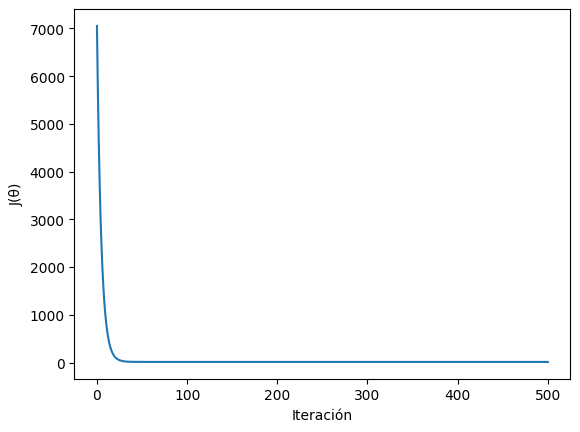

In [29]:
it = list(range(iteraciones + 1))
plt.plot(it, registro_J)
plt.xlabel('Iteración')
plt.ylabel('J(θ)')
plt.show()

## Fitted line

Predictions $\hat{y} = \theta^T X$; plot data and the fitted line $\hat{y} = \theta_0 + \theta_1 x$.

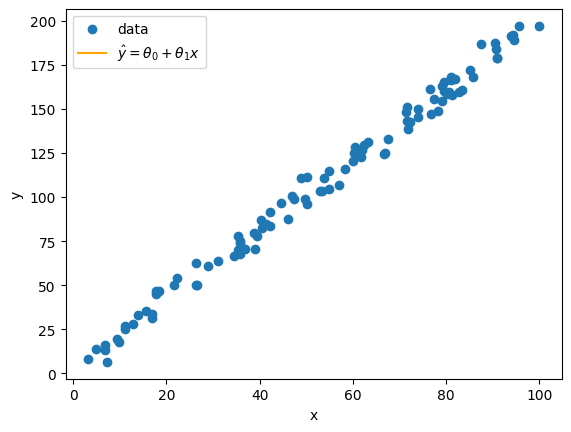

In [14]:
Yhat = h(X, theta)
# Use original x for axis (scaled x is in X[1, :])
order = np.argsort(x_vals_original[0, :])
plt.scatter(x_vals_original[0, :], y[0, :], label='data')
plt.plot(x_vals_original[0, order], Yhat[0, order], color='orange', label=r'$\hat{y} = \theta_0 + \theta_1 x$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Making a prediction

For a new $x$ value: $\hat{y} = \theta^T x_{\text{new}}$ with $x_{\text{new}} = [1, x]^T$.

In [15]:
x_new_val = 50.0
x_new_scaled = (x_new_val - x_mean) / x_std   # same scaling as training
x_new = np.array([[1], [x_new_scaled]])       # (2, 1) with bias
y_pred = h(x_new, theta)
print(f'Para x = {x_new_val}, predicción ŷ = {y_pred[0, 0]:.4f}')
print(f'Parámetros: θ0 (intercept) = {theta[0, 0]:.4f}, θ1 (slope) = {theta[1, 0]:.4f}')

Para x = 50.0, predicción ŷ = nan
Parámetros: θ0 (intercept) = nan, θ1 (slope) = nan
